<a href="https://colab.research.google.com/github/alimurrofid/PCVK_Genap_2023/blob/main/week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TUGAS PRAKTIKUM**

Catatan: Untuk gambar pada praktikum ini menggunakan gambar pada link berikut:

https://drive.google.com/drive/folders/1d4U8FVnQ0Hq_K1Sy4XJvQsgq12ZjvmgK?usp=sharing

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, buat notebook baru dan beri nama “Week11.ipynb”.
Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan
cara sebagai berikut.

# **Object Detection**

Metode yang digunakan:
1.  Template Matching
2.  Edge Detection
3.  Corner Detection
4.  Grid Detection
5.  Contour Detection

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

# **Template Matching**

Menggunakan library openCV

cv.matchTemplate() dengan parameter:

-   **image**: citrea input
-   **templ**: template yang dicari, ukurannya tidak boleh lebih besar dari citra input
-   **method**: metode dan template matching

Jenis metode template matching di OpenCV:

1.  TM_SQDIFF
2.  TM_SQDIFF_NORMED
3.  TM_CCORR
4.  TM_CCORR_NORMED
5.  TM_CCOEFF
6.  TM_CCOEFF_NORMED

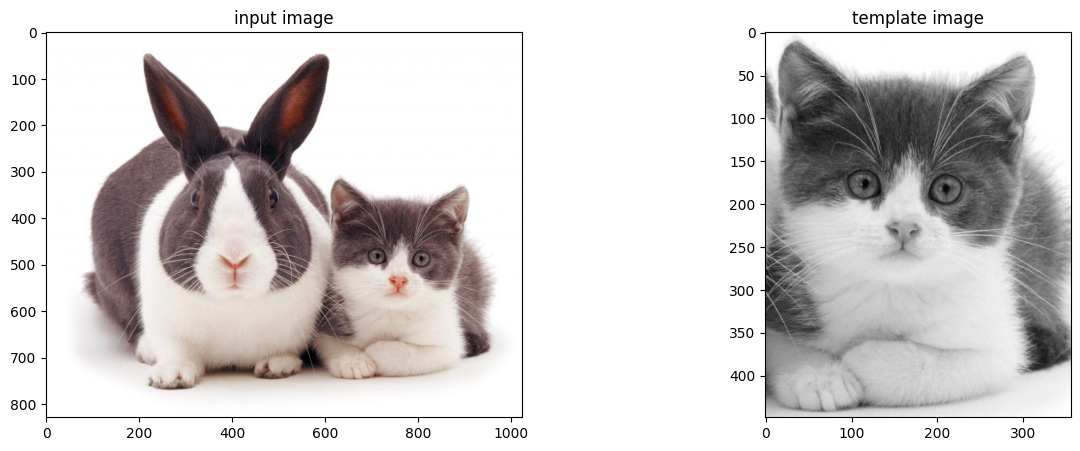

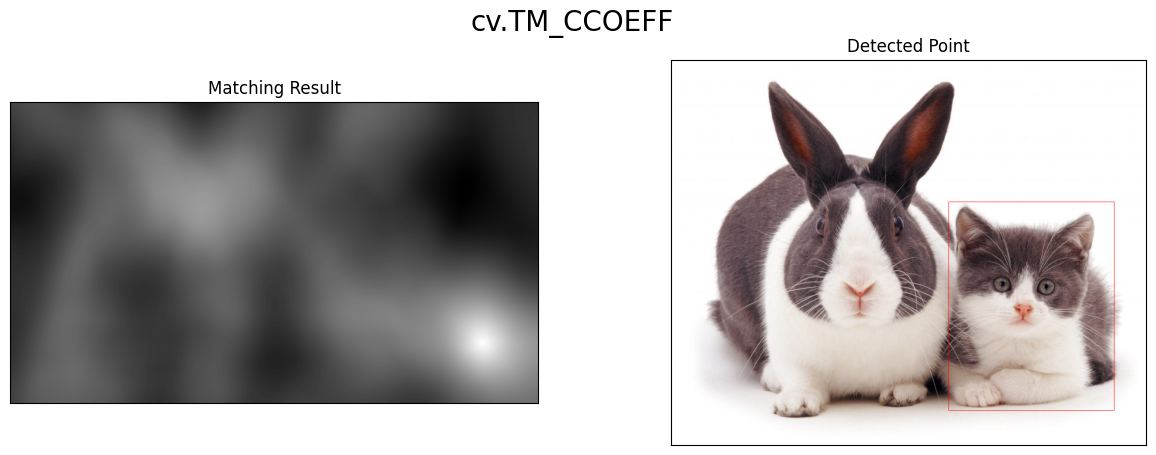

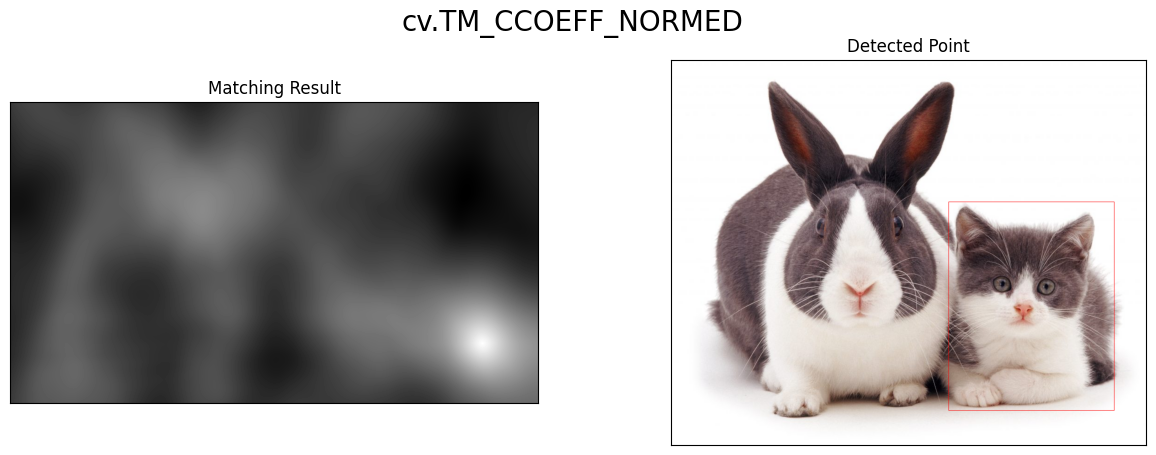

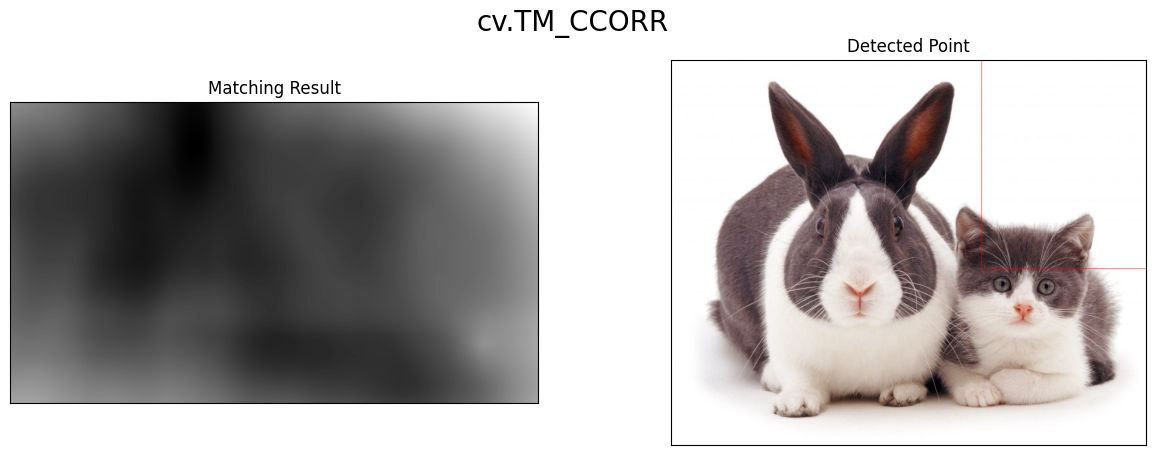

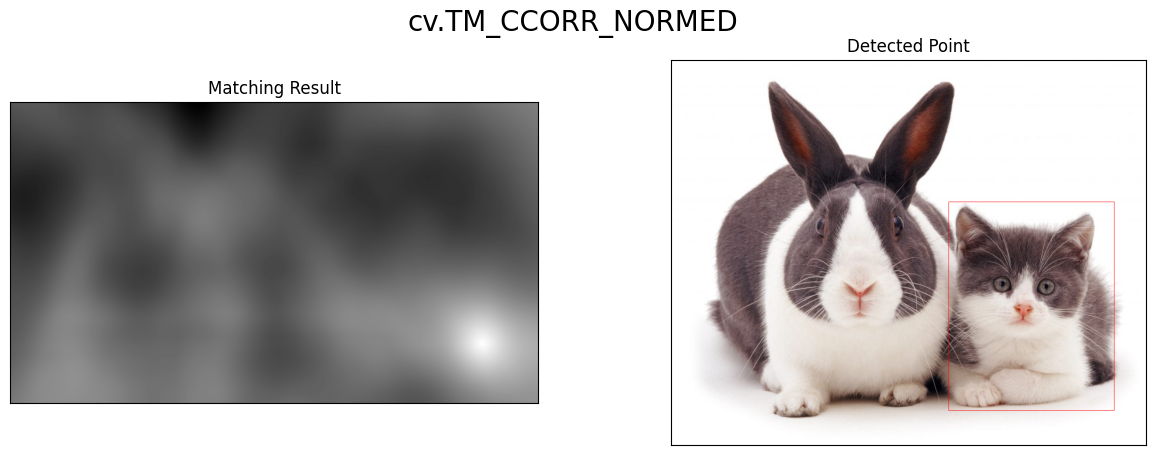

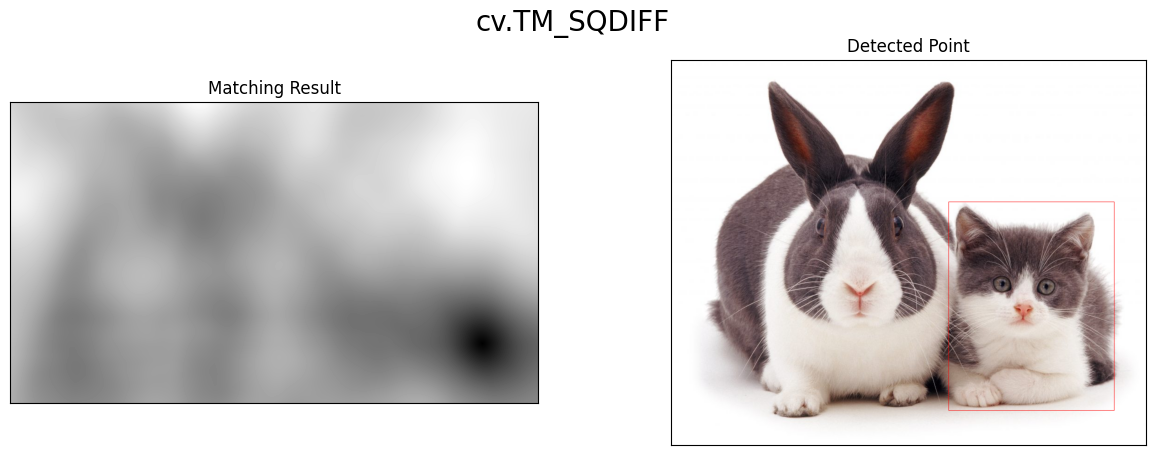

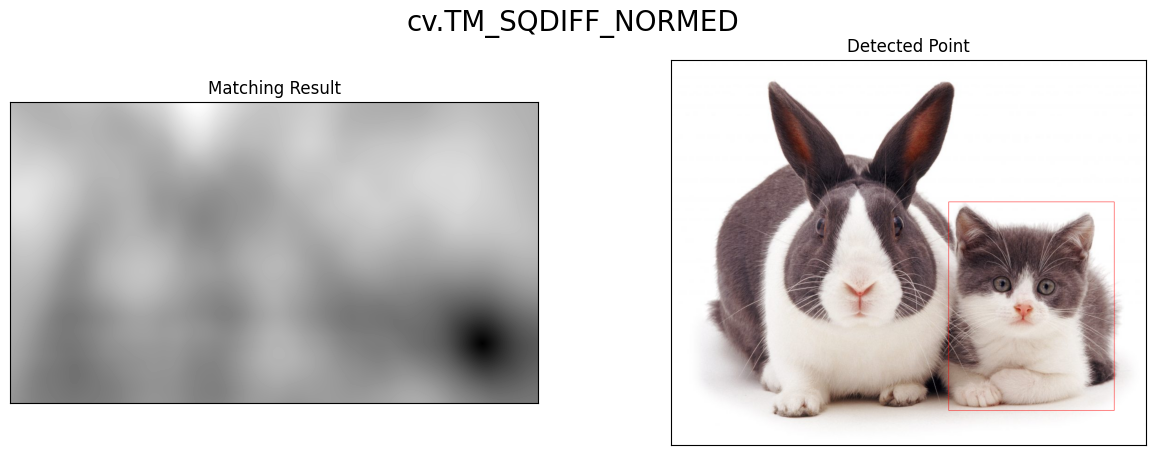

In [3]:
# load citra input
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/Object Detection/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/Object Detection/cat2_templatejpg.jpg',0)
# dimensi citra
w, h = template.shape[::-1]

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255))
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

3. Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai berikut:

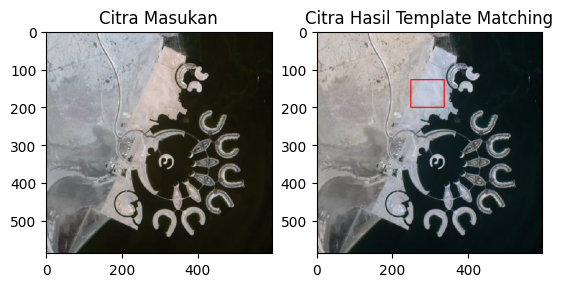

In [4]:
# Baca gambar masukan dan template
input_image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/Object Detection/bahrain.jpg')
template = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/Object Detection/bahrain-template.jpg')

# Tentukan tinggi dan lebar template
t_height, t_width = template.shape[:2]

# Buat citra output yang sama ukurannya dengan citra masukan
result = np.zeros((input_image.shape[0], input_image.shape[1]))

# Lakukan perhitungan Template Matching
for y in range(input_image.shape[0] - t_height + 1):
    for x in range(input_image.shape[1] - t_width + 1):
        # Potong bagian citra yang sesuai dengan ukuran template
        roi = input_image[y:y+t_height, x:x+t_width]

        # Hitung metrik kesamaan (misalnya, SSE: Sum of Squared Differences)
        sse = np.sum((roi - template) ** 2)

        # Masukkan nilai metrik kesamaan ke citra output
        result[y, x] = sse

# Temukan posisi di mana kesamaan maksimum terjadi
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

# Koordinat titik atas kiri kotak yang melingkupi area kesamaan maksimum
top_left = max_loc

# Koordinat titik bawah kanan kotak yang melingkupi area kesamaan maksimum
bottom_right = (top_left[0] + t_width, top_left[1] + t_height)

# Gambar kotak di sekitar area kesamaan maksimum pada citra asli
matched_image = cv.cvtColor(input_image.copy(), cv.COLOR_BGR2RGB)
cv.rectangle(matched_image, top_left, bottom_right, (255, 0, 0), 2)

# Tampilkan citra asli dan citra yang telah di-Match dengan kotak
plt.subplot(121), plt.imshow(input_image)
plt.title('Citra Masukan')
plt.subplot(122), plt.imshow(matched_image)
plt.title('Citra Hasil Template Matching')
plt.show()

4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga menghasilkan luaran sebagai berikut:

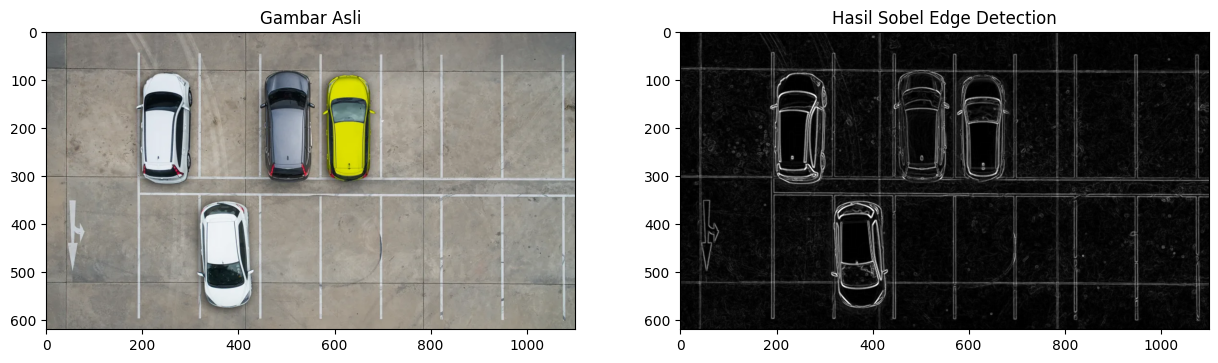

In [5]:
# Nomor 4 (a. Sobel Edge Detection)

# Baca gambar
img0 = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/Object Detection/car-park.jpg')

# Konversi ke grayscale
gray = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)

# Hilangkan noise dengan Gaussian Blur
img = cv.GaussianBlur(gray, (3, 3), 0)

# Terapkan filter Sobel horizontal dan vertical
img_sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)

# Gabungkan hasil dari filter Sobel horizontal dan vertical
img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

# Tampilkan gambar asli dan gambar hasil Sobel Edge Detection
f, axarr = plt.subplots(1, 2, figsize=(15, 5))
axarr[0].imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
axarr[0].set_title('Gambar Asli')
axarr[1].imshow(img_sobelxy, cmap='gray')
axarr[1].set_title('Hasil Sobel Edge Detection')

plt.show()

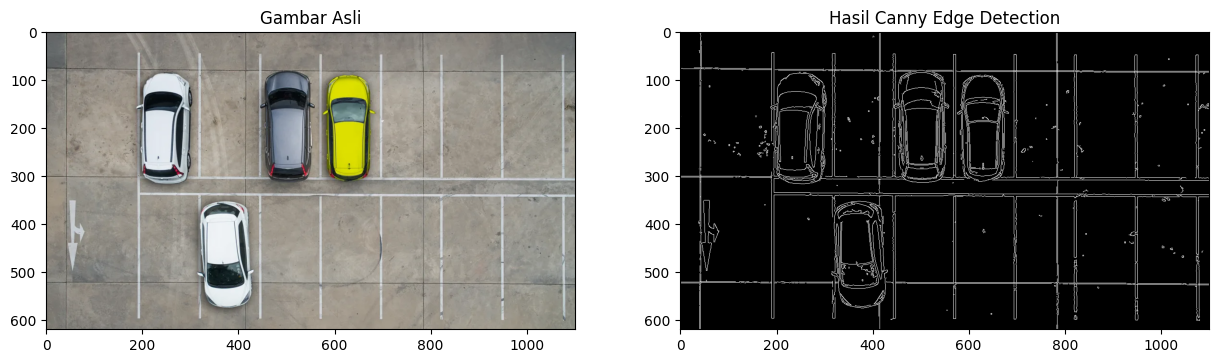

In [6]:
# Nomor 4 (b. Canny Edge Detection)

# Konversi ke grayscale
gray = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)

# Terapkan metode Canny Edge Detection
edged = cv.Canny(gray, 100, 200)

# Tampilkan gambar asli dan hasil dari Canny Edge Detection
f, axarr = plt.subplots(1, 2, figsize=(15, 5))
axarr[0].imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
axarr[0].set_title('Gambar Asli')
axarr[1].imshow(edged, cmap='gray')
axarr[1].set_title('Hasil Canny Edge Detection')

plt.show()

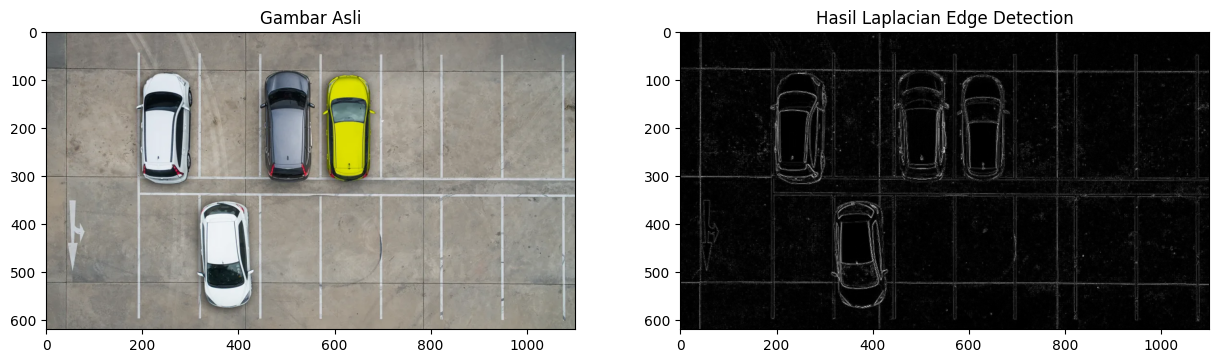

In [7]:
# Nomor 4 (c. Laplacian Edge Detection)

# Konversi ke grayscale
gray = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)

# Terapkan metode Laplacian Edge Detection
laplacian = cv.Laplacian(gray, cv.CV_64F)

# Ambil nilai absolut dan konversi ke tipe data uint8
laplacian_abs = cv.convertScaleAbs(laplacian)

# Tampilkan gambar asli dan hasil dari Laplacian Edge Detection
f, axarr = plt.subplots(1, 2, figsize=(15, 5))
axarr[0].imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
axarr[0].set_title('Gambar Asli')
axarr[1].imshow(laplacian_abs, cmap='gray')
axarr[1].set_title('Hasil Laplacian Edge Detection')

plt.show()

5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan luaran sebagai berikut:


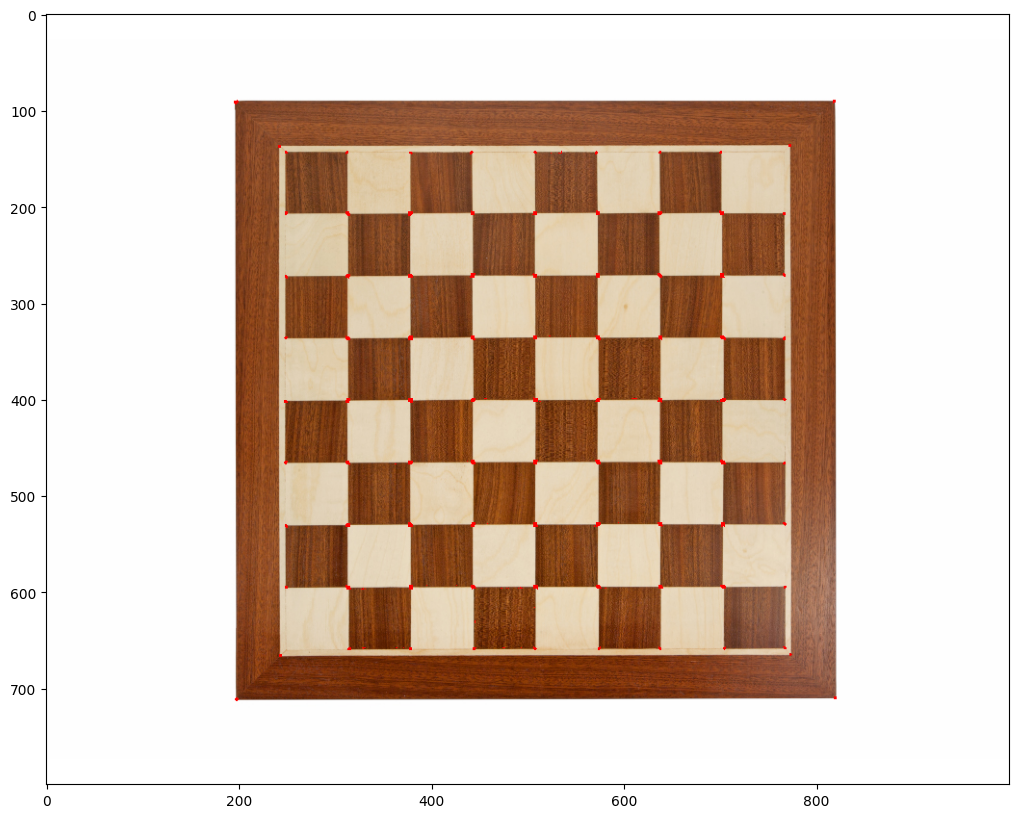

In [8]:
# Nomor 5 (a. Harris Corner Detection)

# load citra input
input_img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/Object Detection/chess-board.jpg')
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray_img,3,1,0.04)

gray_img = np.float32(gray_img)
harris_output = cv.cornerHarris(gray_img,2,3, 3)
# Hasil harris corner dilakukan dilasi untuk menandai sudut
harris_output = cv.dilate(harris_output, None)

# Threshold untuk mengoptimalkan nilai
input_img[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

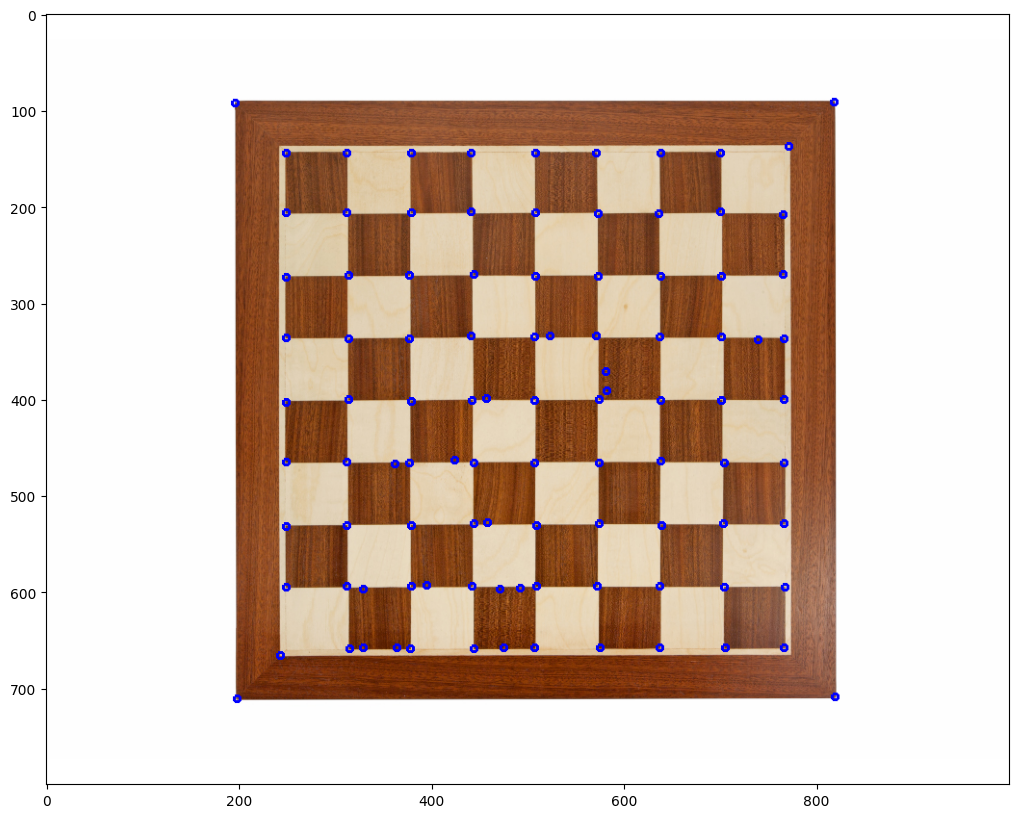

In [9]:
# Nomor 5 (b. Shi-Tomasi Detection)

input_img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/Object Detection/chess-board.jpg')
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray_img, 100,0.01,10)
corners = np. int0(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(input_img, (x,y),3,255,2)

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan teori, sehingga menghasilkan luaran sebagai berikut:

number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


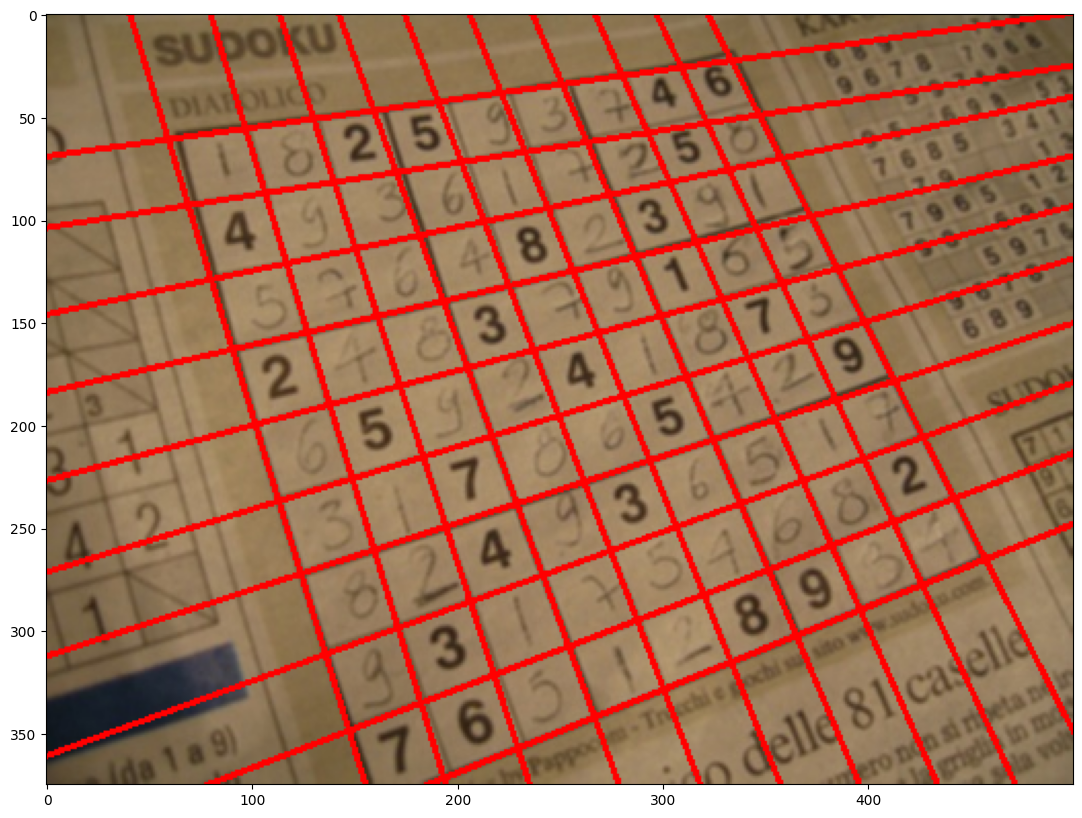

In [10]:
input_img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/Object Detection/sudoku.jpg')
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8)
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8)
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines were found')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1


    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
      for j in range (len (lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True]
    for i in range(len(lines) - 1):
        if not line_flags [indices[i]]:
            continue

        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines ))
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv.line(input_img, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(20,10))
    plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

7.  Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:

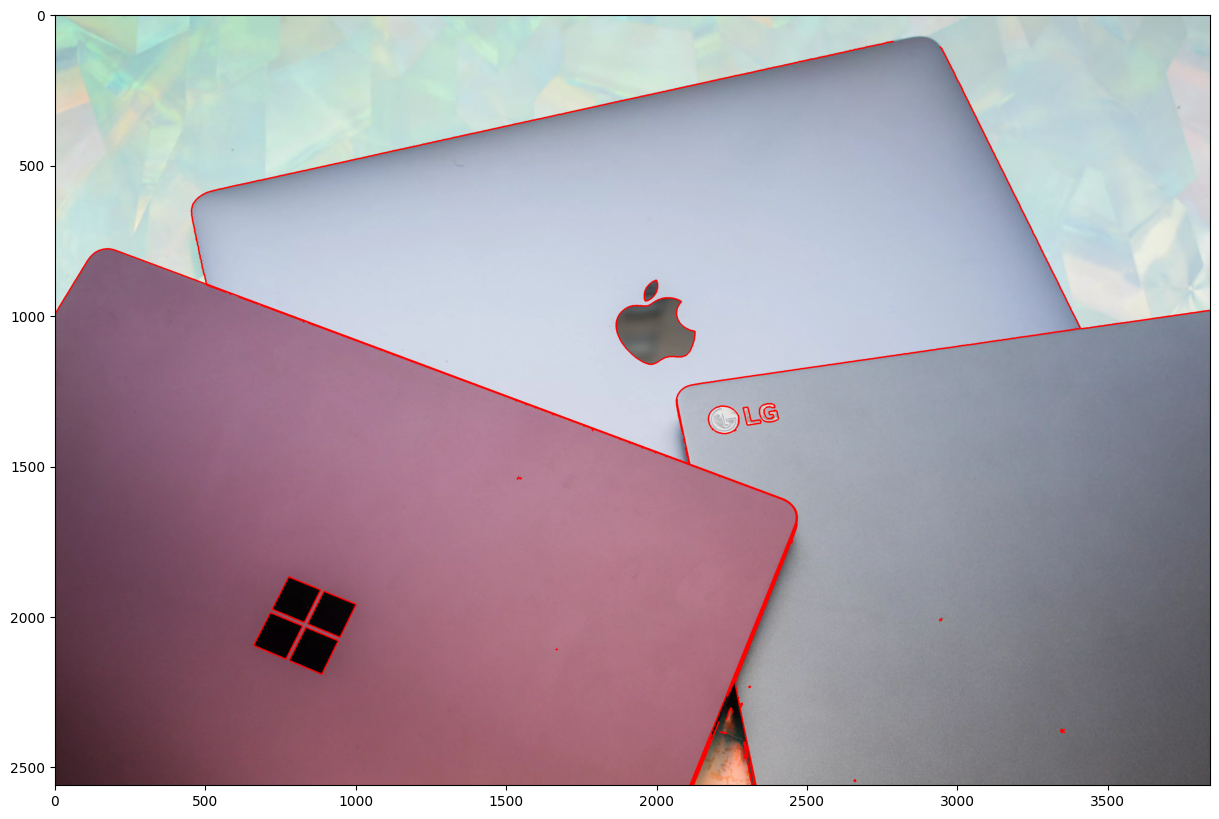

In [11]:
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/Object Detection/laptop.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))